# Getting started

In [1]:
import os
import datetime as dt
import pandas as pd
import xarray as xr
import hatyan
hatyan.close('all')

# optionally set logging level/format (and stream to prevent red background)
import logging, sys
logging.basicConfig(level="INFO", format='%(message)s', stream=sys.stdout)

In [2]:
# defining a list of the components to be analysed ()'year' contains 94 components and the mean H0)
const_list = hatyan.get_const_list_hatyan('year')


In [3]:
# reading and editing time series (Cuxhaven dataset from UHSLC database)
# results in a pandas DataFrame a 'values' column (water level in meters) and a pd.DatetimeIndex as index
file_data_meas = 'http://uhslc.soest.hawaii.edu:80/opendap/rqds/global/hourly/h825a.nc'
times_pred = slice("2017-01-01", "2018-12-31", "10min")
ts_data = xr.open_dataset(file_data_meas)
ts_data_sel = ts_data.sea_level.isel(record_id=0).sel(time=slice(times_pred.start,times_pred.stop))
# correct from mm to meters and for 5m offset
ts_data_sel = (ts_data_sel/1000-5).assign_attrs({'units':'meters'})
ts_meas = pd.DataFrame({'values':ts_data_sel.to_series()})


In [4]:
# inspect ts_meas
print(ts_meas)


                            values
time                              
2017-01-01 00:00:00.000000    1.56
2017-01-01 01:00:00.028800    1.85
2017-01-01 01:59:59.971200    1.95
2017-01-01 03:00:00.000000    1.68
2017-01-01 04:00:00.028800    1.02
...                            ...
2018-12-31 19:00:00.028800    1.37
2018-12-31 19:59:59.971200    1.36
2018-12-31 21:00:00.000000    1.02
2018-12-31 22:00:00.028800    0.49
2018-12-31 22:59:59.971200   -0.04

[17520 rows x 1 columns]


ANALYSIS initializing
nodalfactors         = True
fu_alltimes          = True
xfac                 = False
source               = schureman
return_allperiods    = True
analysis_perperiod   = Y
xTxmat_condition_max = 12

n components analyzed  = 95
analysis_perperiod=Y, separate periods are automatically determined from timeseries
analyzing 2017 of sequence ['2017', '2018']
#timesteps    = 8760
tstart        = 2017-01-01 00:00:00tstop         = 2017-12-31 22:59:59
timestep      = None
percentage_nan in values_meas_sel: 0.00%
nodal factors (f and u) are calculated for all timesteps
folding frequencies over Nyquist frequency, which is half of the dominant timestep (1.000008 hour), there are 2 unique timesteps)
Rayleigh criterion OK (always>0.70, minimum is 1.00)
Frequencies are far enough apart (always >0.000080, minimum is 0.000114)
calculating xTx matrix
condition of xTx matrix: 3.91
matrix system solved, elapsed time: 0:00:00.097953
analyzing 2018 of sequence ['2017', '2018']
#timestep

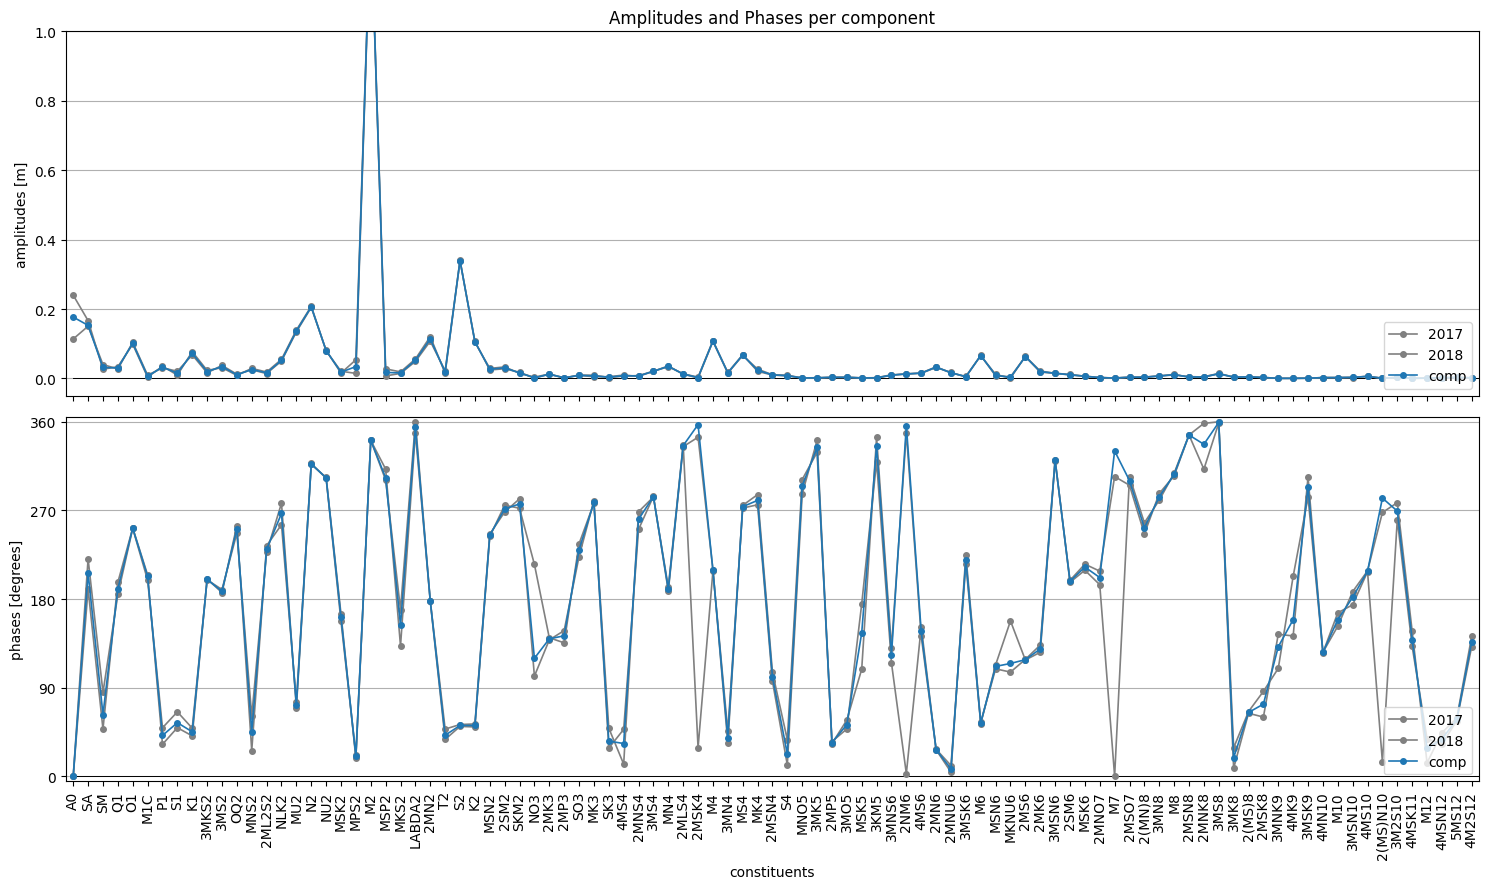

In [5]:
# tidal analysis and plotting of results 
comp_mean, comp_allperiods = hatyan.analysis(ts=ts_meas, const_list=const_list, 
                                               nodalfactors=True, return_allperiods=True,
                                               fu_alltimes=True, analysis_perperiod='Y')
fig,(ax1,ax2) = hatyan.plot_components(comp=comp_mean, comp_allperiods=comp_allperiods)
# fig.savefig('components.png')


In [6]:
# inspect comp_mean and comp_allyears
print(comp_mean)
print()
print(comp_allperiods)


               A     phi_deg
A0      0.176758    0.000000
SA      0.152912  206.382104
SM      0.031652   62.808635
Q1      0.030270  190.224437
O1      0.101336  251.984056
...          ...         ...
4MSK11  0.000341  138.771702
M12     0.000908   28.411757
4MSN12  0.002074   37.926474
5MS12   0.002822   57.813504
4M2S12  0.001756  136.493273

[95 rows x 2 columns]

               A               phi_deg            
time        2017      2018        2017        2018
A0      0.239889  0.113627    0.000000    0.000000
SA      0.166434  0.150569  220.878906  190.318683
SM      0.026600  0.040029   85.250947   48.113447
Q1      0.033676  0.027215  184.697532  197.069286
O1      0.098492  0.104180  251.757856  252.197905
...          ...       ...         ...         ...
4MSK11  0.000302  0.000386  147.469195  131.964070
M12     0.000755  0.001103   13.843620   38.324370
4MSN12  0.001891  0.002280   44.353711   32.598718
5MS12   0.002458  0.003188   59.218970   56.729557
4M2S12  0.001593

PREDICTION initializing
nodalfactors         = True
fu_alltimes          = True
xfac                 = False
source               = schureman

prediction() atonce
components used = 95
tstart = 2017-01-01 00:00:00
tstop = 2018-12-31 00:00:00
timestep = <10 * Minutes>
nodal factors (f and u) are calculated for all timesteps
PREDICTION started
PREDICTION finished


(-0.5, 0.5)

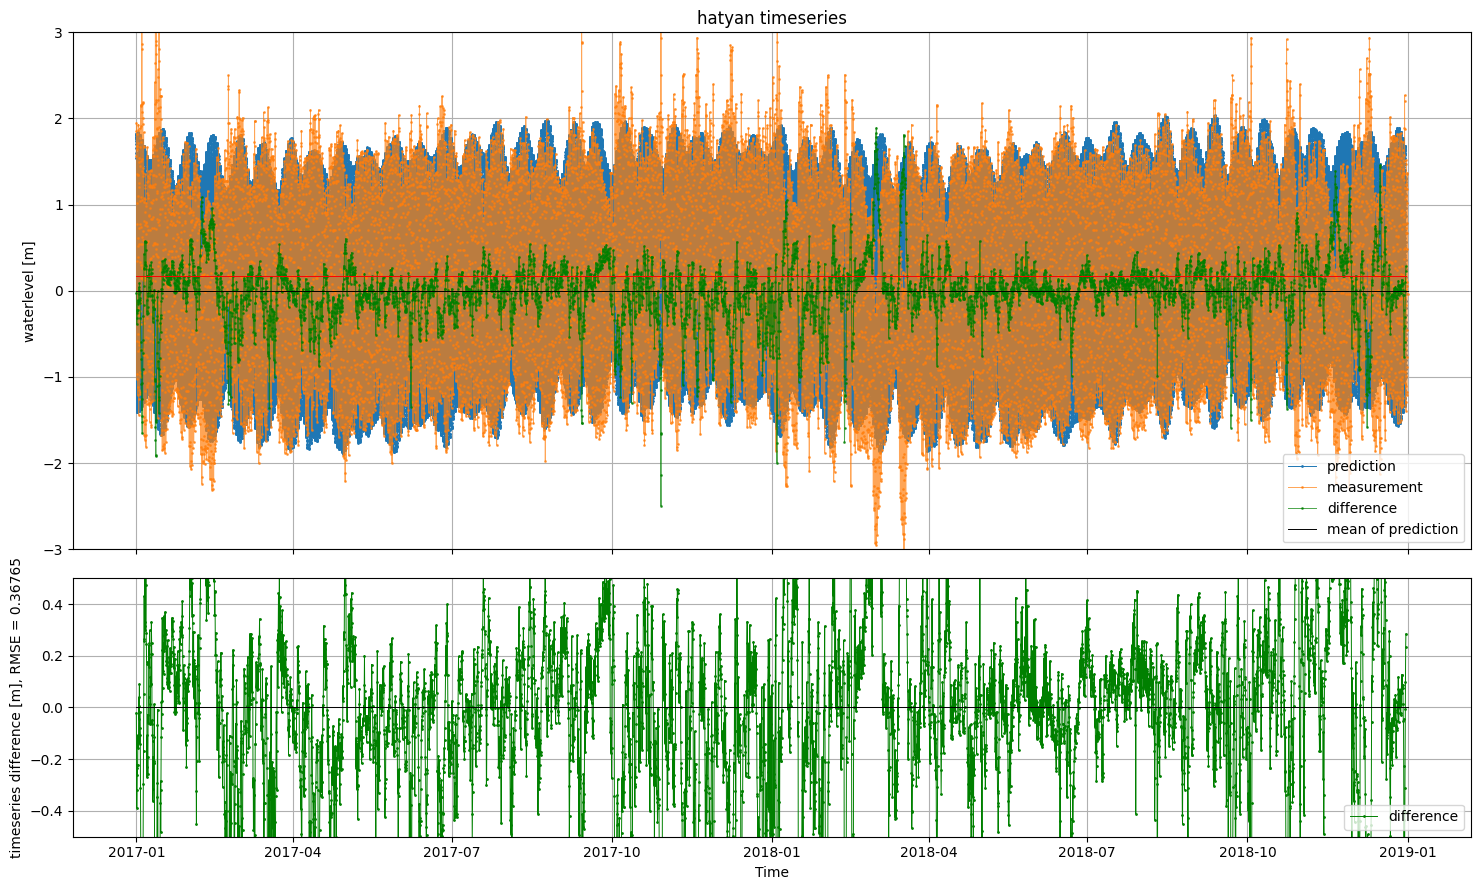

In [7]:
# tidal prediction and plotting of results (prediction settings are derived from the components dataframe)
ts_prediction = hatyan.prediction(comp=comp_mean, times=times_pred)
fig, (ax1,ax2) = hatyan.plot_timeseries(ts=ts_prediction, ts_validation=ts_meas)
ax1.legend(['prediction','measurement','difference','mean of prediction'])
ax2.set_ylim(-0.5,0.5)
# fig.savefig('prediction.png')


the timestep of the series for which to calculate extremes/HWLW is 60.00 minutes, but 1 minute is recommended
the timestep of the series for which to calculate extremes/HWLW is 10.00 minutes, but 1 minute is recommended
Calculating comparison statistics for extremes
HWLWno is not present in ts_ext or ts_ext_validation, trying to automatically derive it without M2phasediff argument (this might fail)
ANALYSIS initializing
nodalfactors         = True
fu_alltimes          = True
xfac                 = False
source               = schureman
return_allperiods    = False
analysis_perperiod   = False
xTxmat_condition_max = 250

n components analyzed  = 1
#timesteps    = 2815
tstart        = 2017-01-01 08:30:00tstop         = 2018-12-30 12:40:00
timestep      = None
percentage_nan in values_meas_sel: 0.00%
nodal factors (f and u) are calculated for all timesteps
folding frequencies over Nyquist frequency, which is half of the dominant timestep (5.666666666666667 hour), there are 14 unique times

(-1.0, 1.0)

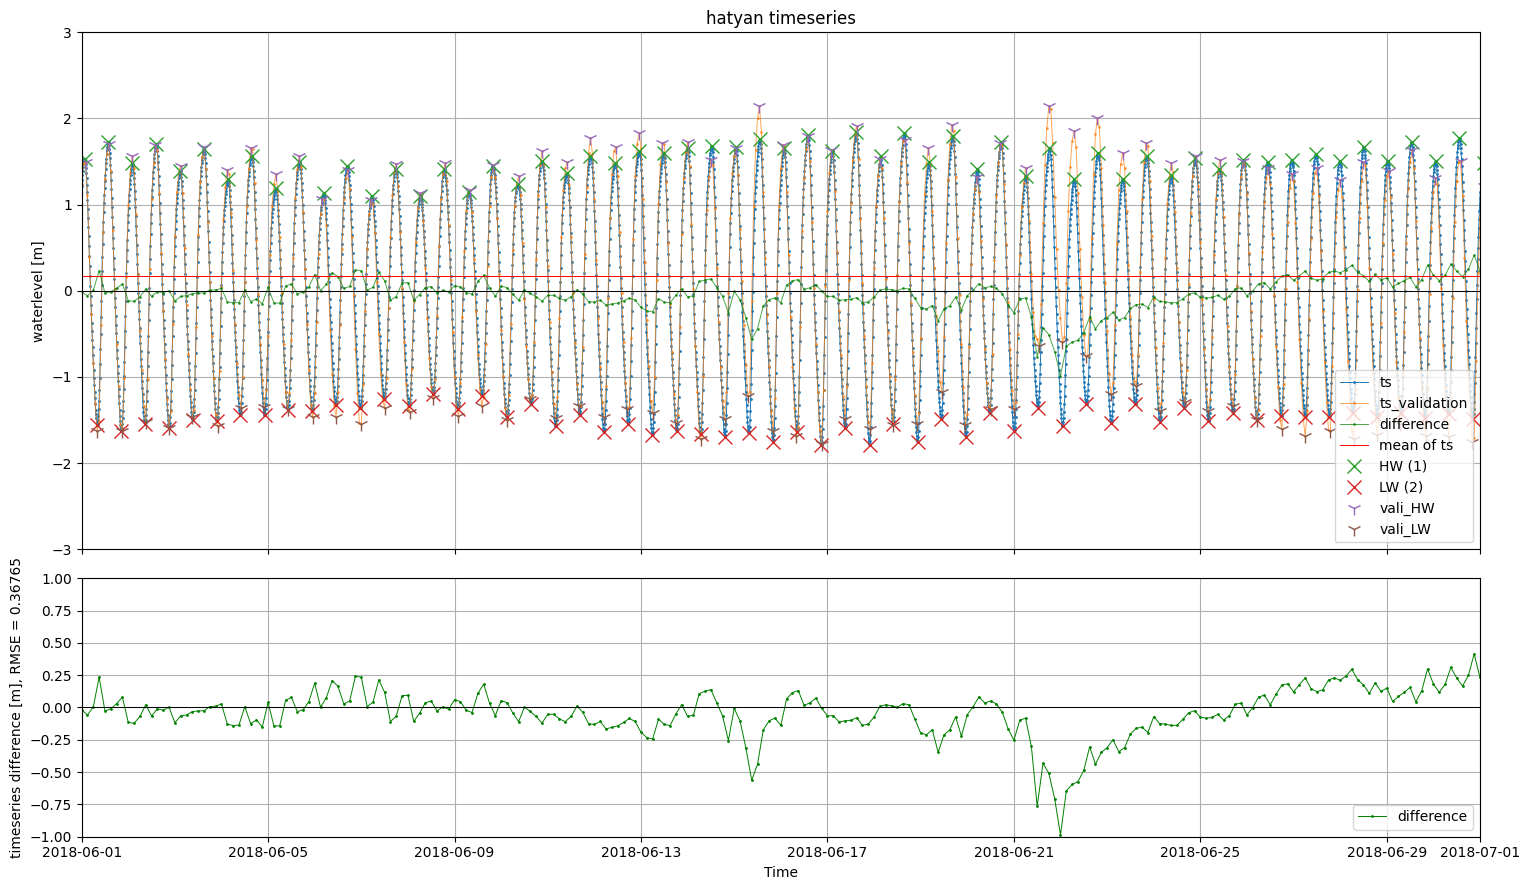

In [8]:
# calculation of HWLW and plotting of results
ts_ext_meas = hatyan.calc_HWLW(ts=ts_meas)
ts_ext_prediction = hatyan.calc_HWLW(ts=ts_prediction)
fig, (ax1,ax2) = hatyan.plot_timeseries(ts=ts_prediction, ts_validation=ts_meas, 
                                        ts_ext=ts_ext_prediction, ts_ext_validation=ts_ext_meas)
ax1.set_xlim(dt.datetime(2018,6,1),dt.datetime(2018,7,1))
ax2.set_ylim(-1,1)
# fig.savefig('prediction_HWLW.png')


In [9]:
# inspect ts_prediction and ts_ext_meas
print(ts_prediction)
print()
print(ts_ext_meas)


                       values
2017-01-01 00:00:00  1.539879
2017-01-01 00:10:00  1.601895
2017-01-01 00:20:00  1.655407
2017-01-01 00:30:00  1.700647
2017-01-01 00:40:00  1.737943
...                       ...
2018-12-30 23:20:00 -0.805737
2018-12-30 23:30:00 -0.859481
2018-12-30 23:40:00 -0.910867
2018-12-30 23:50:00 -0.959596
2018-12-31 00:00:00 -1.005056

[104977 rows x 1 columns]

                            values  HWLWcode  prominences    widths
times                                                              
2017-01-01 09:00:00.000000   -1.02         2         2.84  5.715404
2017-01-01 13:59:59.971200    1.82         1         2.84  6.345138
2017-01-01 21:00:00.000000   -1.21         2         3.14  5.791464
2017-01-02 01:59:59.971200    1.93         1         3.14  6.542304
2017-01-02 09:00:00.000000   -1.44         2         3.39  5.983549
...                            ...       ...          ...       ...
2018-12-30 13:00:00.028800   -1.07         2         2.26  5.130510


Calculating comparison statistics for extremes
HWLWno is not present in ts_ext or ts_ext_validation, trying to automatically derive it without M2phasediff argument (this might fail)
ANALYSIS initializing
nodalfactors         = True
fu_alltimes          = True
xfac                 = False
source               = schureman
return_allperiods    = False
analysis_perperiod   = False
xTxmat_condition_max = 250

n components analyzed  = 1
#timesteps    = 2815
tstart        = 2017-01-01 08:30:00tstop         = 2018-12-30 12:40:00
timestep      = None
percentage_nan in values_meas_sel: 0.00%
nodal factors (f and u) are calculated for all timesteps
folding frequencies over Nyquist frequency, which is half of the dominant timestep (5.666666666666667 hour), there are 14 unique timesteps)
calculating xTx matrix
condition of xTx matrix: 7.71
matrix system solved, elapsed time: 0:00:00
ANALYSIS finished
no value or None for argument M2phasediff provided, automatically calculated correction w.r.t. Cadz

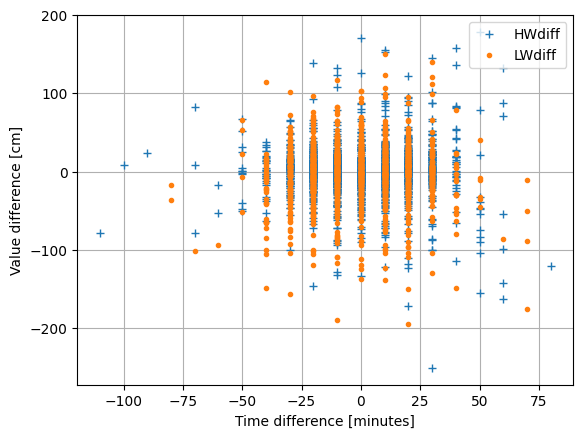

In [10]:
fig, ax = hatyan.plot_HWLW_validatestats(ts_ext=ts_ext_prediction, ts_ext_validation=ts_ext_meas)
# fig.savefig('prediction_HWLW_validatestats.png')
# ts_prediction.attrs["station"] = "Cuxhaven"
# ts_prediction.attrs["vertref"] = "MSL"
# ts_ext_prediction.attrs["station"] = "Cuxhaven"
# ts_ext_prediction.attrs["vertref"] = "MSL"
# hatyan.write_netcdf(ts=ts_prediction, ts_ext=ts_ext_prediction, filename='prediction.nc')
